# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

## Anàlisi de les Distribucions dels Atributs

### Importació de Llibreries

In [1]:
PACKAGES = ["pandas", "matplotlib", "numpy", "seaborn"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import importlib
import sys
sys.path.append('../mobicat_python_utils')

import utils
importlib.reload(utils)

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import IPython.display 
IPython.display.clear_output()

### Importació de les Dades

**Important**: importa al directori *test-data* els següents fitxers o canviar el directori pel directori amb els fitxers. 
```bash
    movilidad_barrios_2023-01_origen.csv
    movilidad_municipios_2023-01_origen.csv
    movilidad_mun_barrios_2023-01_origen.csv
```

In [2]:
mobility_directory = "./test-data/"
mobility_file_name = "movilidad_municipios_2023-01_origen.csv"
mobility_file_path = os.path.join(mobility_directory, mobility_file_name)

mobility_df = pd.read_csv(mobility_file_path, dtype=str)
mobility_df["viajes"] = mobility_df["viajes"].astype(int)
mobility_df["day"] = pd.to_datetime(mobility_df["day"])
mobility_df = mobility_df[mobility_df["viajes"] > 0]

Trobem la distribució dels viatges per municipi.

In [18]:
municipalities_df = utils.group_by_municipality(mobility_df) # viajes origen + destino

municipalities_df.head(20)

,municipio,municipio_name,viajes
0,08001,Abrera,926039
1,08002,Aguilar de Segarra,31743
2,08003,Alella,676085
3,08004,Alpens,2064
4,08005,"Ametlla del Vallès, L'",339925
5,08006,Arenys de Mar,668665
6,08007,Arenys de Munt,394992
7,08008,Argençola,10387
8,08009,Argentona,399999
9,08010,Artés,117052


In [27]:
mobility_df.head()

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes
4,2023-01-01,Domingo,01,Regional,08001,Abrera,08015,Badalona,52
7,2023-01-01,Domingo,01,Regional,08001,Abrera,08019,Barcelona,324
8,2023-01-01,Domingo,01,Nacional,08001,Abrera,08019,Barcelona,34
9,2023-01-01,Domingo,01,Internacional,08001,Abrera,08019,Barcelona,87
10,2023-01-01,Domingo,01,Residente,08001,Abrera,08019,Barcelona,475


In [65]:
day_freq = mobility_df.groupby(by="day_of_week")["viajes"].sum().reset_index()
day_freq

,day_of_week,viajes
0,Domingo,11220581
1,Jueves,15635250
2,Lunes,18600579
3,Martes,18811868
4,Miércoles,15951547
5,Sábado,12160058
6,Viernes,14677035


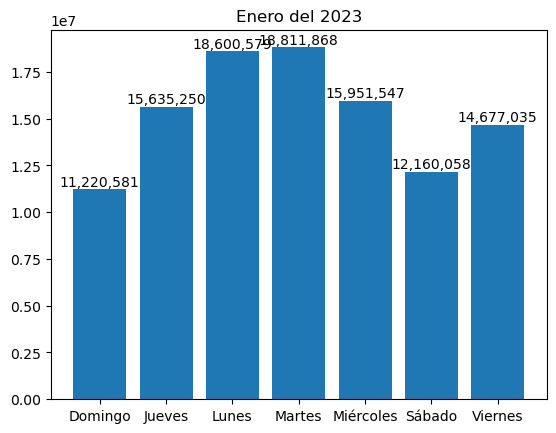

In [73]:
fig, ax = plt.subplots()
bars = ax.bar(day_freq["day_of_week"], day_freq["viajes"])
ax.bar_label(bars, fmt='{:,.0f}')
plt.title("Enero del 2023")
plt.show()

In [20]:
origen_freq = mobility_df.groupby(by="origen")["viajes"].sum().reset_index()
origen_freq

,origen,viajes
0,Internacional,6255110
1,Nacional,4599479
2,Regional,82111917
3,Residente,14090412


<BarContainer object of 4 artists>

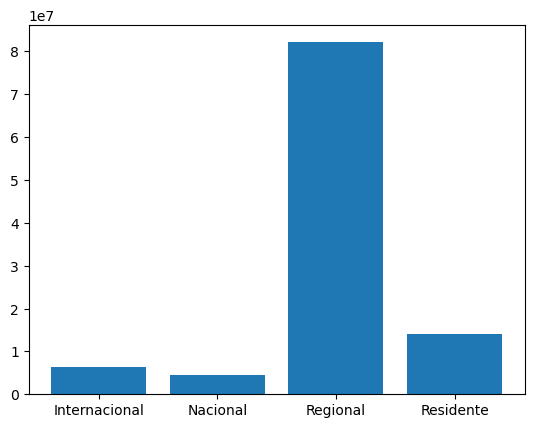

In [36]:
plt.figure()
plt.bar(origen_freq["origen"], origen_freq["viajes"])

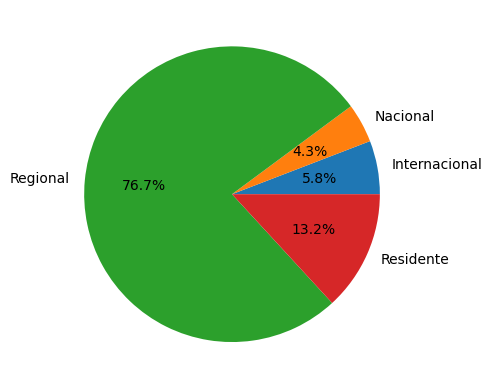

In [ ]:
fig, ax = plt.subplots()
ax.pie(origen_freq["viajes"], labels=origen_freq["origen"], autopct="%1.1f%%")
plt.show()

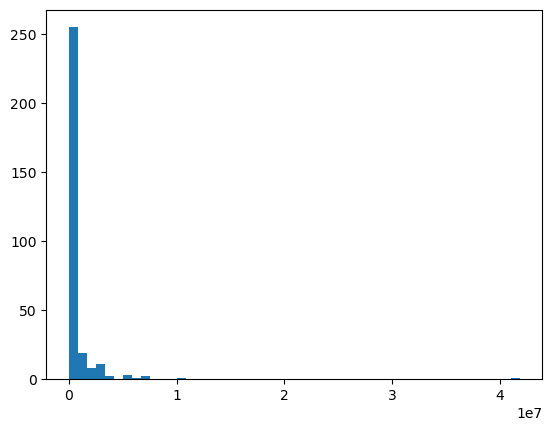

In [83]:
fig, ax = plt.subplots()
ax = plt.hist(municipalities_df["viajes"], bins=50)
plt.show()

In [95]:
top5 = municipalities_df.nlargest(5, "viajes")
top5

,municipio,municipio_name,viajes
18,08019,Barcelona,41877977
98,08101,"Hospitalet de Llobregat, L'",10763201
180,08187,Sabadell,7017716
14,08015,Badalona,7014641
165,08169,"Prat de Llobregat, El",6089574


<BarContainer object of 5 artists>

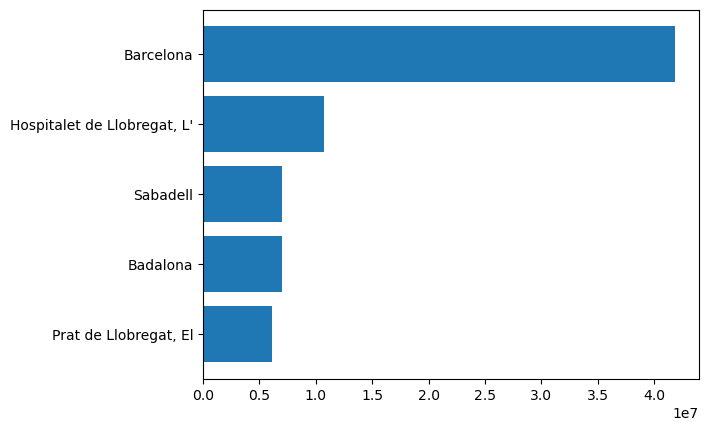

In [97]:
top5_sorted = top5.sort_values(by="viajes", ascending=True) 

plt.barh(top5_sorted["municipio_name"], top5_sorted["viajes"])

In [93]:
sub5 = municipalities_df.nsmallest(5, "viajes")
sub5

,municipio,municipio_name,viajes
133,08137,Montseny,134
286,08297,Veciana,136
171,08177,"Quar, La",174
47,08048,Carme,498
49,08050,Castellar del Riu,650


<BarContainer object of 5 artists>

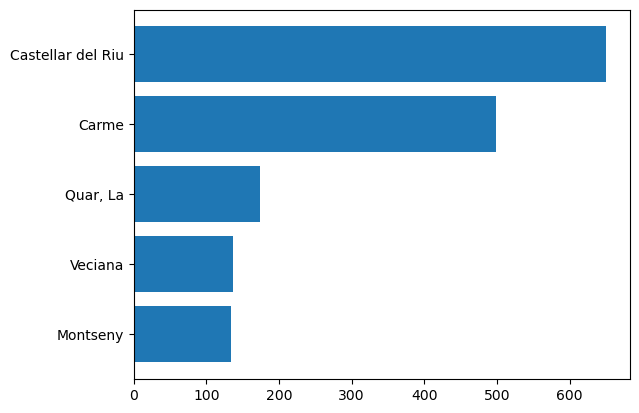

In [98]:
plt.barh(sub5["municipio_name"], sub5["viajes"])

In [91]:
# utils.group_by_municipality_type(mobility_df, _type="destino")

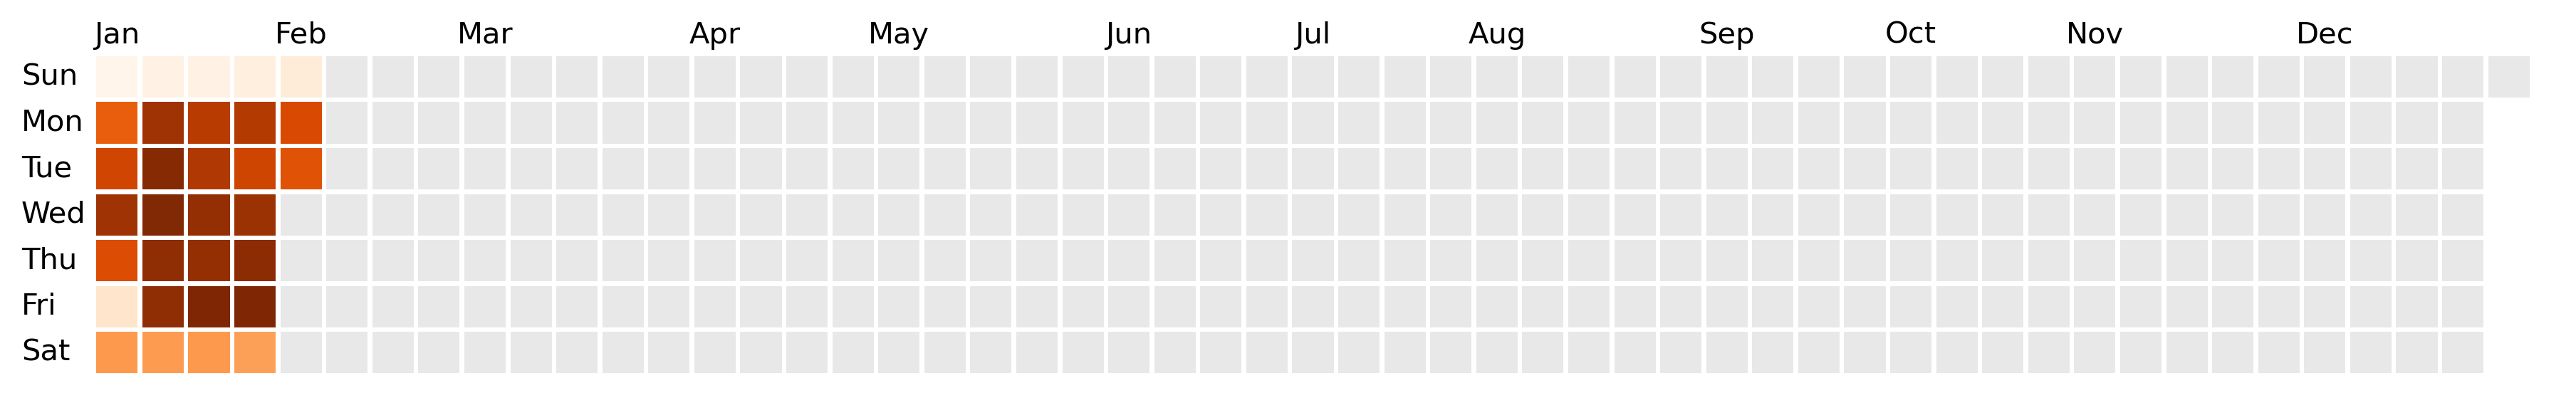

In [ ]:
import dayplot as dp

fig, ax = plt.subplots(figsize=(15, 6), dpi=300)

dp.calendar(
    dates=mobility_df["day"],
    values=mobility_df["viajes"],
    start_date="2023-01-01",
    end_date="2023-12-31",
    ax=ax,
    cmap="Oranges"
)
plt.show()

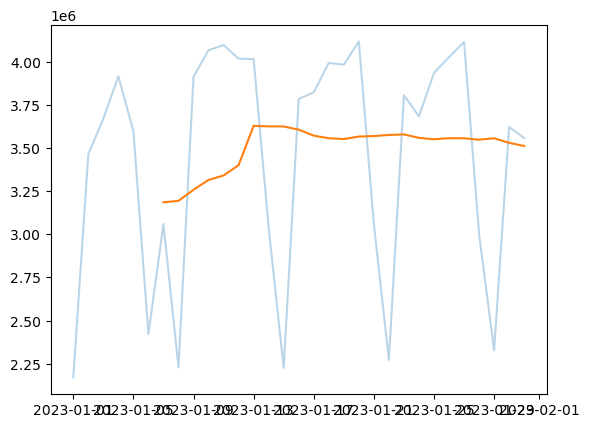

In [102]:
s = d.rolling(7).mean()
plt.plot(d.index, d.values, alpha=.3); plt.plot(s.index, s.values)

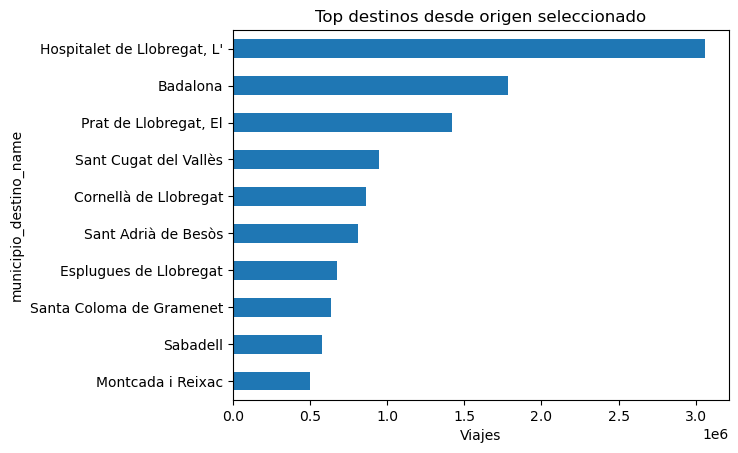

In [104]:
origen_sel = "08019"  # Barcelona (ej.)
topd = (mobility_df[mobility_df["municipio_origen"]==origen_sel]
        .groupby("municipio_destino_name")["viajes"].sum().nlargest(10))
topd.plot.barh(); plt.xlabel("Viajes"); plt.title("Top destinos desde origen seleccionado"); plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Histograma (eje Y log)')

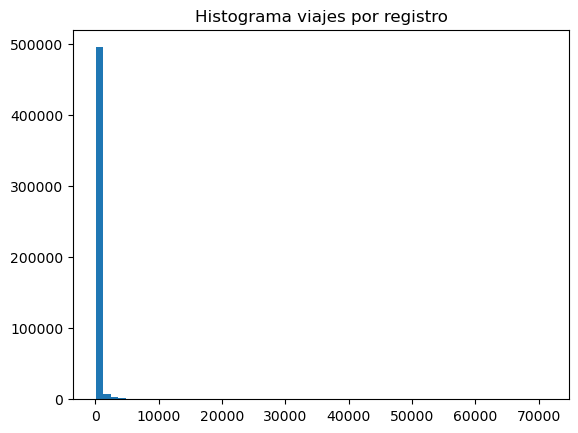

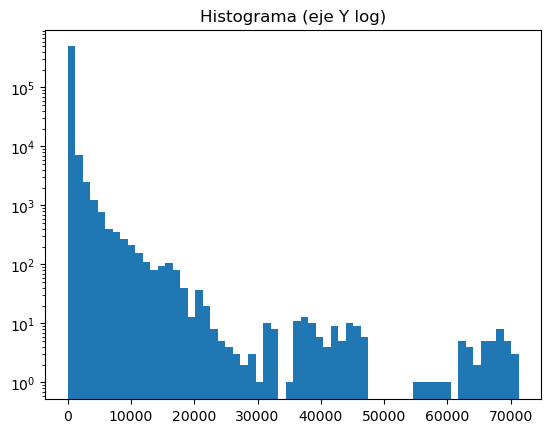

In [106]:
x = mobility_df["viajes"]
plt.figure(); plt.hist(x, bins=60); plt.title("Histograma viajes por registro")
plt.figure(); plt.hist(x, bins=60); plt.yscale("log"); plt.title("Histograma (eje Y log)")

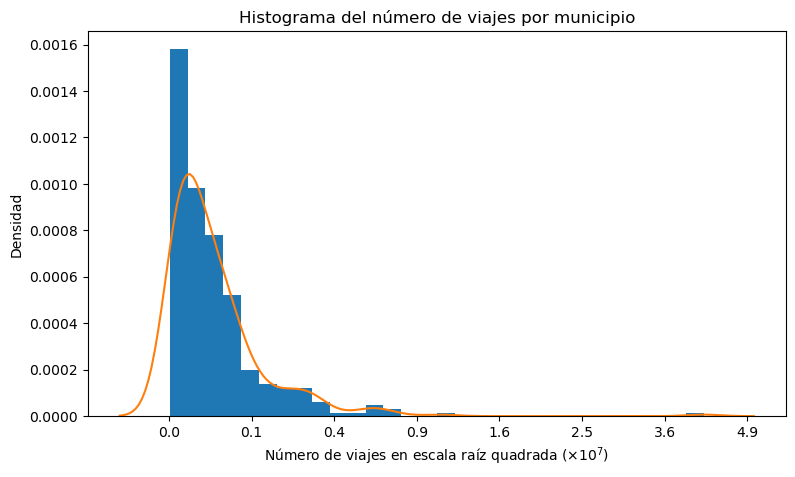

In [58]:
plt.figure(figsize=(9, 5))

plt.hist(
    x=np.sqrt(municipalities_df["viajes"]),
    density=True,
    bins=30,
)

sns.kdeplot(
    x=np.sqrt(municipalities_df["viajes"]),
)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Número de viajes en escala raíz quadrada $(×10^7)$")
plt.ylabel("Densidad")
ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = [t**2/1e7 for t in ticks]
plt.xticks(ticks, labels)

plt.show()

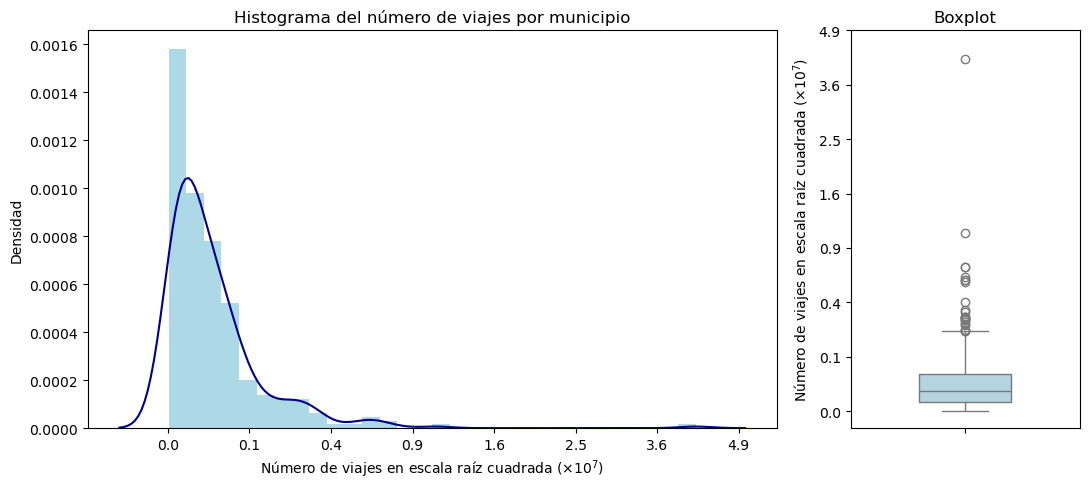

In [99]:
x = np.sqrt(municipalities_df["viajes"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [3, 1]})

ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = [t**2/1e7 for t in ticks]

ax1.hist(
    x,
    density=True,
    bins=30,
    color="lightblue",
    alpha=1.0
)
sns.kdeplot(
    x=x,
    ax=ax1,
    color="darkblue"
)

values_label = "Número de viajes en escala raíz cuadrada $(×10^7)$"

ax1.set_title("Histograma del número de viajes por municipio")
ax1.set_xlabel(values_label)
ax1.set_ylabel("Densidad")



ax1.set_xticks(ticks)
ax1.set_xticklabels([f"{l:.1f}" for l in labels])

sns.boxplot(
    y=x,
    ax=ax2,
    color="lightblue",
    width=0.4
)

ax2.set_title("Boxplot")
ax2.set_ylabel(values_label) 
ax2.set_xlabel("") 
ax2.set_yticks(ticks)
ax2.set_yticklabels([f"{l:.1f}" for l in labels])

plt.tight_layout()
plt.show()

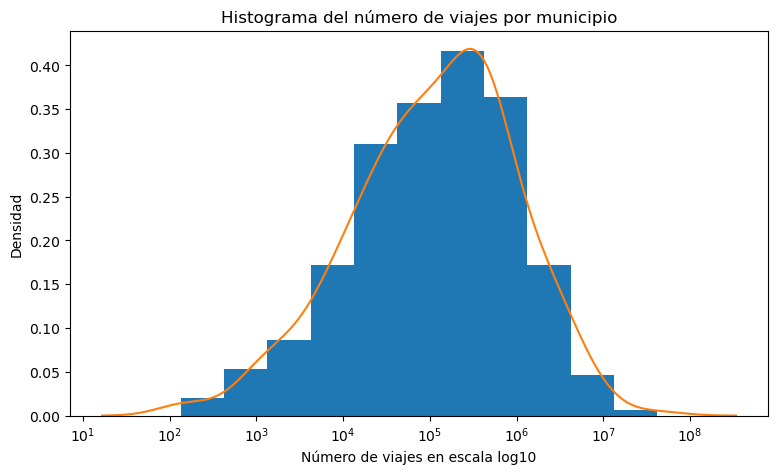

In [100]:
plt.figure(figsize=(9, 5))

plt.hist(
    x=np.log10(municipalities_df["viajes"]),
    density=True,
    bins=11
)

sns.kdeplot(
    x=np.log10(municipalities_df["viajes"]),
)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Número de viajes en escala log10")
plt.ylabel("Densidad")
ticks = [ 1, 2, 3, 4, 5, 6, 7, 8] 
labels = [f"$10^{t}$" for t in ticks]
plt.xticks(ticks, labels)
plt.show()

In [115]:
trans_df = pd.read_csv("../catalonia-geography-maps/TRANSPORTS.csv")
trans_df.head()

,CODI_CAPA,CAPA_GENERICA,NOM_CAPA,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LONGITUD,LATITUD,EQUIPAMENT,DISTRICTE,BARRI,NOM_DISTRICTE,NOM_BARRI,ADRECA,TELEFON
0,K004,Transports i serveis relacionats,Tren a l'aeroport,432343.180,4584819.321,432251.231,4584618.362,2.189397,41.410259,Tren AEROPORT - CLOT-,10.0,65.0,Sant Martí,el Clot,NaN,NaN
1,K002,Transports i serveis relacionats,Ferrocarrils Generalitat (FGC),427818.595,4583478.761,427726.688,4583277.816,2.135427,41.397791,FGC - BONANOVA-,5.0,26.0,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,NaN,NaN
2,K002,Transports i serveis relacionats,Ferrocarrils Generalitat (FGC),428146.731,4584356.984,428054.821,4584156.031,2.139248,41.405731,FGC - EL PUTXET-,5.0,27.0,Sarrià-Sant Gervasi,el Putxet i el Farró,NaN,NaN
3,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,432161.470,4584722.980,432069.523,4584522.022,2.187234,41.409376,Clot (Aragó / Meridiana)-,10.0,65.0,Sant Martí,el Clot,NaN,NaN
4,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,431886.081,4587016.870,431794.137,4586815.891,2.183681,41.430013,Fabra i Puig (Avinguda Meridiana)-,9.0,60.0,Sant Andreu,Sant Andreu,NaN,NaN
